In [121]:
import os
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('bmh')

original_data_filename = '12_S╠üWIE╠ĘTOKRZYSKIE.csv'
go_up_by = len('Command Files')
analysis_data_filepath = os.getcwd()[:-go_up_by] + f'Analysis Data/tidy_{original_data_filename}'
data_appendix_filepath = os.getcwd()[:-go_up_by] + f'Documents/'

df = pd.read_csv(analysis_data_filepath).iloc[:, 1:]
df.head(10)

,Dni od zakupu,Marka,Wiek kupującego,Płeć kupującego,Ocena
0,7,Beko,33.0,M,3.0
1,7,Beko,55.0,bd.,3.0
2,10,Beko,50.0,M,2.0
3,11,Tefal,36.0,M,2.5
4,3,Beko,62.0,K,2.5
5,14,Electrolux,46.0,bd.,2.5
6,8,Beko,38.0,M,2.0
7,10,Beko,43.0,bd.,2.0
8,6,Beko,52.0,bd.,3.0
9,10,Electrolux,52.0,M,0.5


Dla każdej z kolumn rysuję histogram, bądź wykres słupkowy i zapisuję wyniki jako materiały do data_appendix.

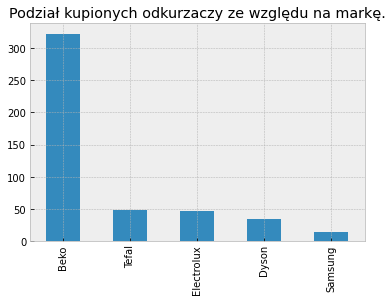

In [122]:
df['Marka'].value_counts().plot.bar()
plt.title('Podział kupionych odkurzaczy ze względu na markę.')
plt.savefig(data_appendix_filepath + 'data_appendix_hist0')
plt.show()

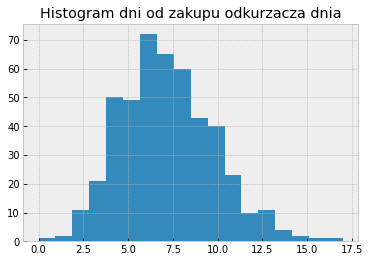

In [123]:
bins = df['Dni od zakupu'].nunique()
df['Dni od zakupu'].hist(bins=bins)
plt.title('Histogram dni od zakupu odkurzacza dnia')
plt.savefig(data_appendix_filepath + 'data_appendix_hist1')
plt.show()

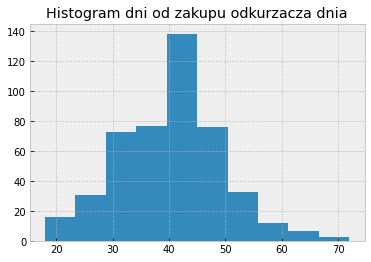

In [124]:
df['Wiek kupującego'].hist()
plt.title('Histogram dni od zakupu odkurzacza dnia')
plt.savefig(data_appendix_filepath + 'data_appendix_hist2')
plt.show()

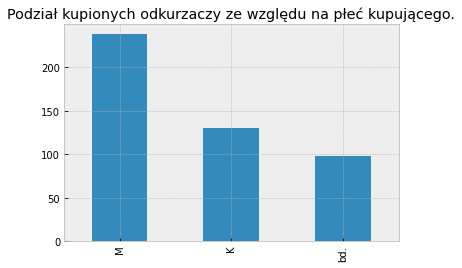

In [125]:
df['Płeć kupującego'].value_counts().plot.bar()
plt.title('Podział kupionych odkurzaczy ze względu na płeć kupującego.')
plt.savefig(data_appendix_filepath + 'data_appendix_hist3')
plt.show()

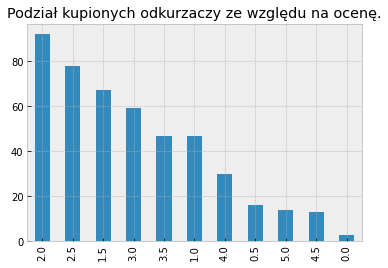

In [126]:
df['Ocena'].value_counts().plot.bar(sort_columns=True)
plt.title('Podział kupionych odkurzaczy ze względu na ocenę.')
plt.savefig(data_appendix_filepath + 'data_appendix_hist4')
plt.show()

### Analizując zbiór danych chciałbym odpowiedzieć na 3 pytania:
- jaka jest mediana ocen każdej z marek odkurzaczy?
- jak różnią się oceny odkurzaczy ze względu na wiek?
- jak różnią się oceny odkurzaczy ze względu na płeć?

### Jaka jest mediana ocen każdej z marek odkurzaczy?

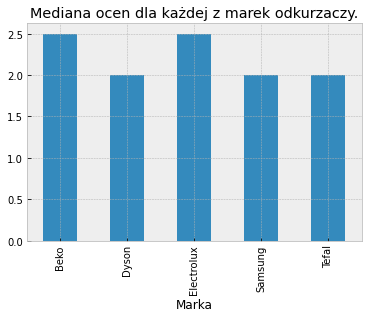

In [127]:
# aby rzetelnie ocenić dany produkt na pewno trzeba go kilka razy popróbować, zatem będę brać pod uwagę jedynie oceny po co najmniej 5 dniach po zakupie
vaccum_rating = df[df['Dni od zakupu'] >= 5].groupby('Marka')['Ocena']
median_vaccum_rating= vaccum_rating.median()
median_vaccum_rating.plot.bar()
plt.title('Mediana ocen dla każdej z marek odkurzaczy.')
plt.savefig(data_appendix_filepath + 'data_appendix_median_vaccum_rating')
plt.show()

Można zauważyć, że najwyższe oceny pod względem mediany mają odkurzacze marki Electrolux oraz Beko, ale poza tym to generalnie są one całkiem pododbne. Użytecznym zatem będzie również sprawdzenie jak prezentuje się rozkład ocen dla każdej z marek odkurzaczy.


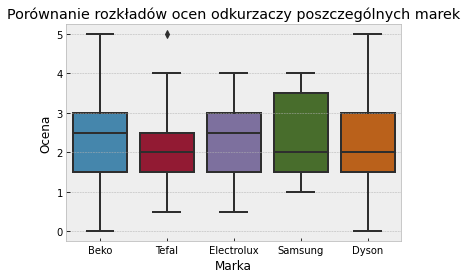

In [128]:
import seaborn as sns
sns.boxplot(x='Marka', y='Ocena', data=df[df['Dni od zakupu'] >= 5])
plt.title('Porównanie rozkładów ocen odkurzaczy poszczególnych marek')
plt.savefig(data_appendix_filepath + 'data_appendix_dist_vaccum_rating')
plt.show()

Jak można zauważyć Beko pomimo jednej z najwyższych median ocen ma dosyć szeroką rozpiętość ocen z lekkim przekrzywieniem w stronę tych słabszych ocen. Dla porównania Samsung jest mocniej przekrzywiony w stronę lepszych wartości ocen. Przyczyną takiego rozkładu ocen w przypadku odkurzaczy Beko, czy też Dyson może być pewna stronniczość klientów(ktoś nie lubi marki X zatem da jej słabą ocenę albo zaznaczy najwyższą ocenę aby system zbierania feedbacku się od niego 'odczepił'). Do rzetelniejszej analizy potrzebne by były na pewno treści recenzji, a nie jedynie oceny danego produktu.

### Jak różnią się oceny odkurzaczy ze względu na wiek?

Współczynnik korelacji wieku kupującego i oceny odkurzaczy: -0.10152332751198487


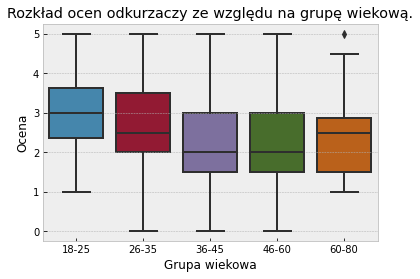

In [129]:
# do dalszej analizy korzystam również z poprzedniego założenia
df = df[df['Dni od zakupu'] >= 5]
# dzielę klientów na 5 grup wiekowych
age18_25 = df['Wiek kupującego'] <= 25
age25_35 = (df['Wiek kupującego'] > 25) & (df['Wiek kupującego'] <= 35)
age35_45 = (df['Wiek kupującego'] > 35) & (df['Wiek kupującego'] <= 45)
age45_60 = (df['Wiek kupującego'] > 45) & (df['Wiek kupującego'] <= 60)
age60_80 = df['Wiek kupującego'] > 60
age_groups = {1: '18-25', 2: '26-35', 3: '36-45', 4: '46-60', 5: '60-80'}
df['Grupa wiekowa'] = (age18_25 + 2 * age25_35 + 3 * age35_45 + 4 * age45_60 + 5 * age60_80).apply(lambda age_group: age_groups[age_group])
sns.boxplot(x='Grupa wiekowa', y='Ocena', data=df, order=age_groups.values())
plt.title('Rozkład ocen odkurzaczy ze względu na grupę wiekową.')
plt.savefig(data_appendix_filepath + 'data_appendix_dist_vaccum_rating_by_age')
print(f"Współczynnik korelacji wieku kupującego i oceny odkurzaczy: {df['Wiek kupującego'].corr(df['Ocena'])}")
plt.show()

Można wskazać, że wraz z wiekiem odkurzacze oceniane są niżej. Świadczy o tym również współczynnik korelacji(co warto wspomnieć słabej). Analizę można rozszerzyć o sprawdzenie istnienia jakiejś nielinowej relacji między wiekiem kupującego, a oceną produktu. Z wykresu widać, że mediana ocen w poszczególnych grupach potrafi się różnić nawet o 1 stopień.

### Jak różnią się oceny odkurzaczy ze względu na płeć?

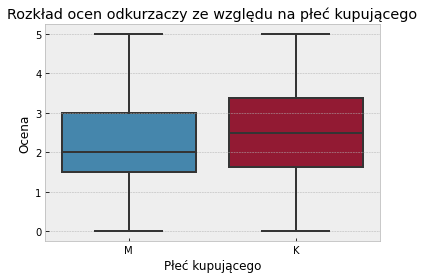

In [130]:
# najpierw muszę pozbyć się opcji 'bd.' z datasetu
df = df[df['Płeć kupującego'] != 'bd.']
sns.boxplot(x='Płeć kupującego', y='Ocena', data=df)
plt.title('Rozkład ocen odkurzaczy ze względu na płeć kupującego')
plt.savefig(data_appendix_filepath + 'data_appendix_dist_vaccum_rating_by_sex')
plt.show()

Można zaobserwować, że kobiety wyżej oceniały zakupione przez siebie odkurzacze w porównaniu do mężczyzn. Może być to spowodowane tym, że bardziej znają się na sprzęcie, którym na co dzień operują, zatem dokonywały trafniejszych zakupów. Możliwe, że wyżej oceniały zakupione odkurzacze, bo im ciężej przyznać się do błędu niż mężczyznom.